<a href="https://colab.research.google.com/github/Ethan-code-1/project_chd/blob/main/Project__2__Coronary_Heart_Disease_WriteUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Summary**:

This paper hopes to showcase the likelihood of a person developing CHD based on specific factors to be able to establish what are the most significant factors that play into CHD. This is able to be accomplished via predictive models, specifically by seeing what variables allow for the predictive model to generate the highest accuracy. The dataset we used is a subset of data from the Framingham Heart Study which has data on a sample of patients. This data showcases important information about how the patient is in terms of health across various factors and how that corresponds to his 10 year CHD risk. For our method, in terms of predictive models, we could utilize linear models, k-nearest neighbors, or decision trees. We decided that we wanted to utilize decision trees as this is able to capture non-linear relationships between features and the target variable as well as make it easy to understand with the most important features being selected at each split. When fitting our decision tree and predicting it on our test set, we ended up achieving a predictive accuracy of 84% which was definitely the most optimal for us. From this, we were able to conclude that the factors that were the most significant predictors in CHD was age, glucose, TotChol, and CigsPerDay. This is important information as it helps the people understand what they need to focus on and be more aware of in order to minimize their risk of developing CHD.

**Data:**


The analysis required the following variables measuring:

- `sex` : the recorded sex of the observationsm with 1 denoting an participant coded as male
- `age` : Age at the time of medical examination in years.
- `education`: A categorical variable of the participants education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
- `currentSmoker`: Current cigarette smoking at the time of examinations
- `cigsPerDay`: Number of cigarettes smoked each day
- `BPmeds`: Use of Anti-hypertensive medication at exam
- `prevalentStroke`: Prevalent Stroke (0 = free of disease)
- `prevalentHyp`: Prevalent Hypertensive. Subject was defined as hypertensive if treated
- `diabetes`: Diabetic according to criteria of first exam treated
- `totChol`: Total cholesterol (mg/dL)
- `sysBP`: Systolic Blood Pressure (mmHg)
- `diaBP`: Diastolic blood pressure (mmHg)
- `BMI`: Body Mass Index, weight (kg)/height (m)^2
- `heartRate`: Heart rate (beats/minute)
- `glucose`: Blood glucose level (mg/dL)
- `TenYearCHD` : The 10 year risk of coronary heart disease(CHD)



We decided to select the relevant variables from looking at correlations and start conducting data cleaning and wrangling. Our data set up is shown below

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv("fhs_train.csv")
df.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


Analyzing relationships between variables through generating correlation matrix

In [ ]:
corr_matrix = df.corr()
#print(corr_matrix)

resp_matrix = corr_matrix['TenYearCHD'].sort_values()
print(resp_matrix)

education         -0.052668
Unnamed: 0        -0.019496
currentSmoker      0.001644
heartRate          0.023205
cigsPerDay         0.047712
prevalentStroke    0.062357
BMI                0.072830
BPMeds             0.088135
sex                0.097138
totChol            0.099704
diabetes           0.105644
glucose            0.126485
diaBP              0.133094
prevalentHyp       0.163910
sysBP              0.205898
age                0.225568
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64


The **first variable** cleaned was education. This variable seemed to have a low negative correlation with the ‘TenYearCHD’ variable (the lowest of the variables present within the data). Due to this, and the relatively low number of missing values, all missing values were simply set to the mean for education field (the value ‘2’).

In [ ]:
education_mean = df['education'].mean()
print(education_mean)

#Mean is essentially 2, so impute all missing values
df['education'].fillna(2, inplace = True)

1.95702746365105


The **second variable** cleaned was ‘cigsPerDay’. This variable is heavily influenced by the ‘currentSmoker’ variable as individuals who do not smoke should have a value of zero for this field. As a result, all individuals with a ‘0’ for currentSmoker were also set to smoke zero cigarettes per day when the value was missing. Individuals marked as current smokers with missing values were handled differently. To impute their value, the mean of cigarettes per day for all individuals who reported being a current smoker was utilized.


In [ ]:
for index, row in df.iterrows():
    if pd.isnull(row['cigsPerDay']):

        if row['currentSmoker'] == 0:
            df.at[index, 'cigsPerDay'] = 0
        else:
            df.at[index, 'cigsPerDay'] = 9

The **third variable** cleaned was ‘BPMeds’. This variable only had 37 missing values and had less significant positive correlation with ‘TenYearCHD’ than other similar variables within the dataset such as ‘diaBP’. Furthermore, so few individuals identified with this category (only around 3% of observations) that it was decided to impute all missing values with 0.


In [ ]:
df['BPMeds'].fillna(0, inplace = True)

The **fourth variable** cleaned was ‘totChol’. This variable also had very few missing values. On average this value was 236.0 mg/dL within patients with a standard deviation of 44.85 mg/dL. The slightly larger standard deviation than expected influenced us to impute the missing values with the median value of 233.0 mg/dL instead, although with both values being so close to one another this may not have been necessary.

In [ ]:
df['totChol'].median()
df['totChol'].fillna(233.0, inplace = True)

The **fifth variable** cleaned was ‘BMI’. This variable had only a few missing values and as such the mean value was used to input the missing fields.

In [ ]:
df['BMI'].mean()
df['BMI'].fillna(25.89, inplace = True)

The **final variable** cleaned was glucose. This variable had by far the most missing values of the dataset but proportionally they were still small to the size of the overall dataset (There were 285 out of 3180 total observations). Furthermore, the variable had a rather high standard deviation and an elevated positive correlated with the diabetes variable. Because the field is believed to be missing completely at random, it was decided that dropping the rows with missing values would not significantly alter the results of our model.


In [ ]:
df.dropna(subset=['glucose'], inplace=True)

In [ ]:
na_counts = df.isna().sum()
print(na_counts)

Unnamed: 0         0
sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


**Results:**

From analyzing the correlation matrix, our initial predictions were that the main factors that would play into CHD would be age, smoking status, and sex. However, when fitting and running our decision tree on the training data, we found that there were other factors that were predictors as well such as glucose, totalChol, and sysBP. Out of all the predictors, age was the most significant predictor and  represented 83% of the split in the decision tree. The way the decision tree is set up is shown below.

[Text(0.5, 0.875, 'x[2] <= 48.5\ngini = 0.264\nsamples = 2895\nvalue = [2442, 453]'),
 Text(0.25, 0.625, 'x[15] <= 232.5\ngini = 0.148\nsamples = 1420\nvalue = [1306, 114]'),
 Text(0.125, 0.375, 'x[10] <= 398.5\ngini = 0.143\nsamples = 1415\nvalue = [1305, 110]'),
 Text(0.0625, 0.125, 'gini = 0.14\nsamples = 1412\nvalue = [1305, 107]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.375, 'x[8] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.625, 'x[15] <= 122.5\ngini = 0.354\nsamples = 1475\nvalue = [1136, 339]'),
 Text(0.625, 0.375, 'x[11] <= 142.75\ngini = 0.341\nsamples = 1428\nvalue = [1117, 311]'),
 Text(0.5625, 0.125, 'gini = 0.283\nsamples = 875\nvalue = [726, 149]'),
 Text(0.6875, 0.125, 'gini = 0.414\nsamples = 553\nvalue = [391, 162]'),
 Text(0.875, 0.375, 'x[13] <= 34.85\ngini = 0.482\nsamples = 4

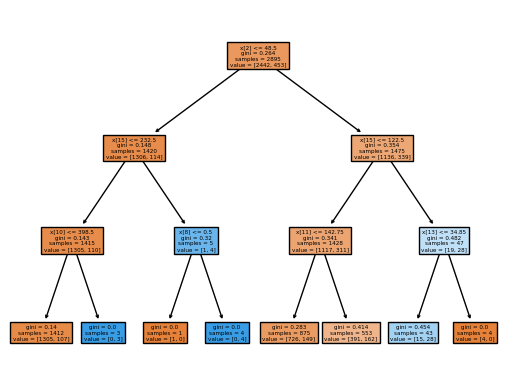

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree # Import the tree classifier

# Process data:
y = df['TenYearCHD']
X = df.drop(['TenYearCHD'], axis=1)

# Fit decision tree:
cart = DecisionTreeClassifier() # Create a classifier object
cart = DecisionTreeClassifier(max_depth=3) #Keeping the tree from over fitting
cart = cart.fit(X, y) # Fit the classifier

# Visualize results:
plot_tree(cart,filled=True)

To get the accuracy of the decision tree, we had to run it again on the test data set cleaned.

**Conclusion:**

After completing this project, we can establish that the goal was assess the likelihood of individuals developing Coronary Heart Disease(CHD) over a ten-year period. We were able to start by using a subset of data from the Framingham Heart Study which focused on identifying the most significant factors that can lead to CHD risk. After understanding and testing various techniques, we found that decision trees would be the most practical in terms of their ability to handle non-linear relationships and showcase the most influential factor in each node.

Using a decision tree as shown in the results section.